# A9.3 PyMC3

By Yi-Chi Liao (yi-chi.liao@aalto.fi)       

Feel free to contact me if there's any questions.

In this assignment, we will go through some basic examples to get you familiar with this library. We'll also compare the difference between traditional statistics and Bayesian statistics.

**Environment requirements: numpy, seaborn, scipy and pymc3**

In [1]:
import pymc3 as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


%matplotlib inline
sns.set()
sns.set_style('white')
sns.set_context('talk')
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

## Task 9.3.1 Parameter estimation from a Frequentist's perspective

We will run a classic parameter estimation task on the mean value of samples. A smartwatch company decided to enable text entry function on their product. Their solution is straightforward, they directly display a qwerty keyboard on the small screen. To ensure this is an acceptable design, they invite 50 users to participate in a user study. The only measurement they collected is the error rate, which are shown below (unit: %). 

![keyboard](images/keyboard.jpg)

In [2]:
error_rate = [24.512, 32.195, 25.611, 35.576, 32.158, 18.731, 31.437, 26.643, 45.866, 35.134, 
              30.499, 33.387, 33.262, 26.232, 22.53, 35.449, 29.985, 41.053, 23.28, 23.698, 
              38.832, 23.071, 12.984, 33.73, 33.893, 28.5, 21.867, 35.697, 33.877, 41.395, 
              26.586, 29.913, 22.655, 48.285, 17.953, 32.941, 21.287, 28.368, 32.517, 32.498, 
              23.71, 45.1, 10.119, 7.923, 32.634, 20.555, 25.022, 26.73, 12.627, 29.69]

print (np.mean(error_rate))
print (np.std(error_rate))

28.76394
8.579121608672999


Given that the least acceptable error rate is 31%, so you're wondering if the mean error rate is different from 31%.   

From a frequentist's perspective, what test will you apply and what will be your conclusion?  
Hint: since we're only wondering if there is a difference, you just need to consider it's 2-sided test.

In [3]:
### Put your code here

**Your conclusion:**   
I use (______) test, and find the statistic values are (______). The results reject/do not reject the null hypothesis.

In [12]:
### Suggested solution

# They should use 1 sample t-test

# They simply need to call scipy.stats.ttest_1samp function
# Which will find the t-stats: -1.82, p = 0.074. 
# And thus, not rejecting the null hypothesis

print("I use 1 sample t-test for determining whether the sample mean is statistically different from a known or hypothesized population mean.")
print()
print(st.ttest_1samp(error_rate,31))
print("Because p > 0.05, we do not reject null hypothesis.")

I use 1 sample t-test for determining whether the sample mean is statistically different from a known or hypothesized population mean.

Ttest_1sampResult(statistic=-1.8244781591831372, pvalue=0.07418002207161647)
Because p > 0.05, we do not reject null hypothesis.


## Task 9.3.2 Parameter estimation from a Bayesian perspective

From the same data and a Bayesian perspective, how will you use PyMC3 to analyze the data?   
Does the mean value less than 31%? How do you know?   
Please also justify your prior distribution on mean (mu), std (sigma) and likelihood function distribution.

In [5]:
### Put your code here

**Your conclusion:**   
Based on the posterior distribution, I found .....   
The conclusion is: 

**Which one, traditional stats or Bayesian stats, do you prefer and why?**     
I prefer:   
Because:  

In [6]:
### Suggested answer

# Step 1. Construct the model

# We can use either uniform distribution or normal distribution to define the mu and sigma
# Either way, they will come to the same conclusion. 
# But the defined range should be reasonable.

# For the likelihood function, becausse the original data has a normal distribution shape,
# it's expected that the student use normal distribution as the model.
with pm.Model() as error_rate_model: 
    
    # If the student use uniform distribution for mu and sigma:
    mu_distribution = pm.Uniform('mu_distribution', 20, 45)
    sigma_distribution = pm.Uniform('sigma_distribution', 0, 15)
    
    # Otherwise, she/he can use normal distribution:
    #prior_mu = pm.Normal('mu_distribution', mu=30, sigma = 15)
    #sigma_distribution = pm.Normal('sigma_distribution', mu =8, sigma = 3)
    
    # For the likelihood function, she/he should use only normal distribution!
    like = pm.Normal('likelihood', mu=mu_distribution, sigma=sigma_distribution,
                        observed=error_rate)  

In [7]:
### Suggested answer

with error_rate_model:
    # don't worry about this:
    step = pm.Metropolis()
    
    # focus on this, the Inference Button:
    error_rate_trace = pm.sample(1000, step=step,cores=4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_distribution]
>Metropolis: [mu_distribution]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
The number of effective samples is smaller than 25% for some parameters.


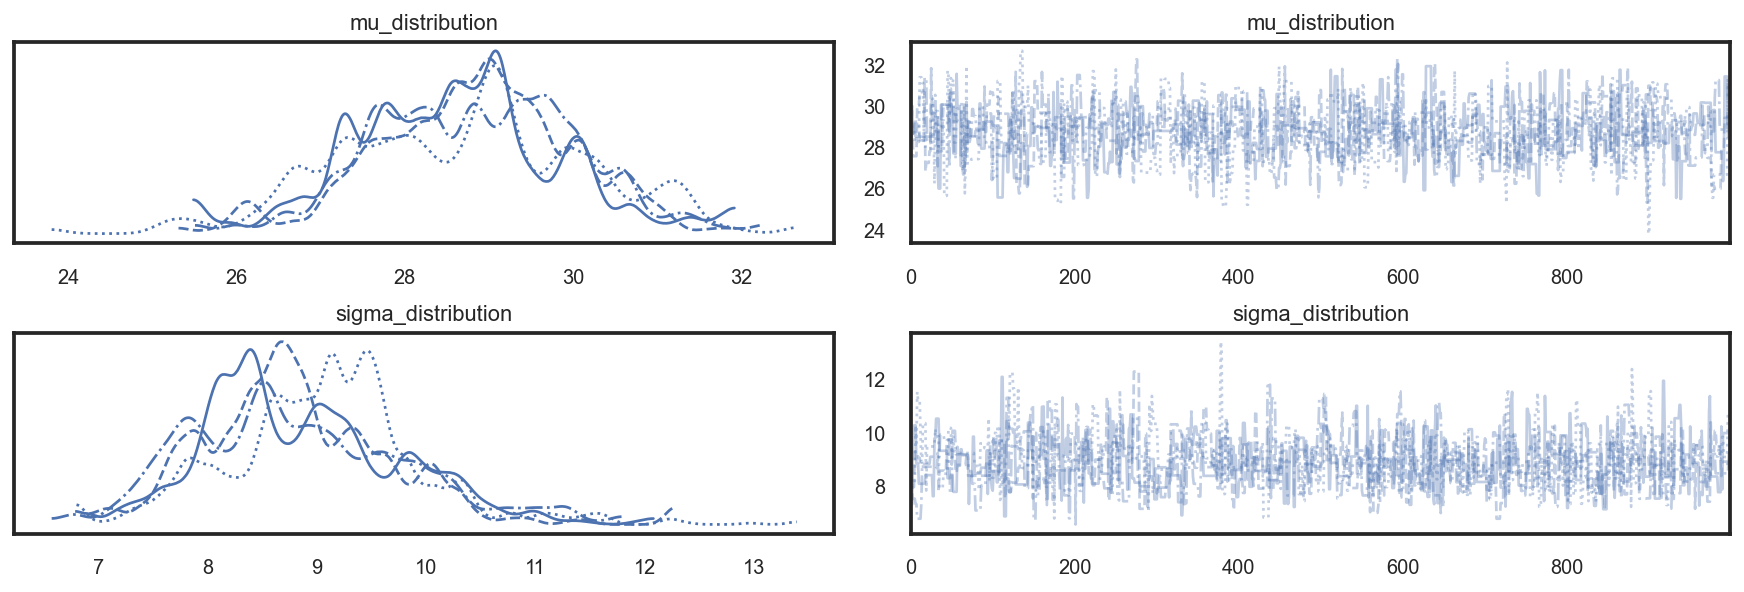

In [8]:
pm.traceplot(error_rate_trace)
plt.show()

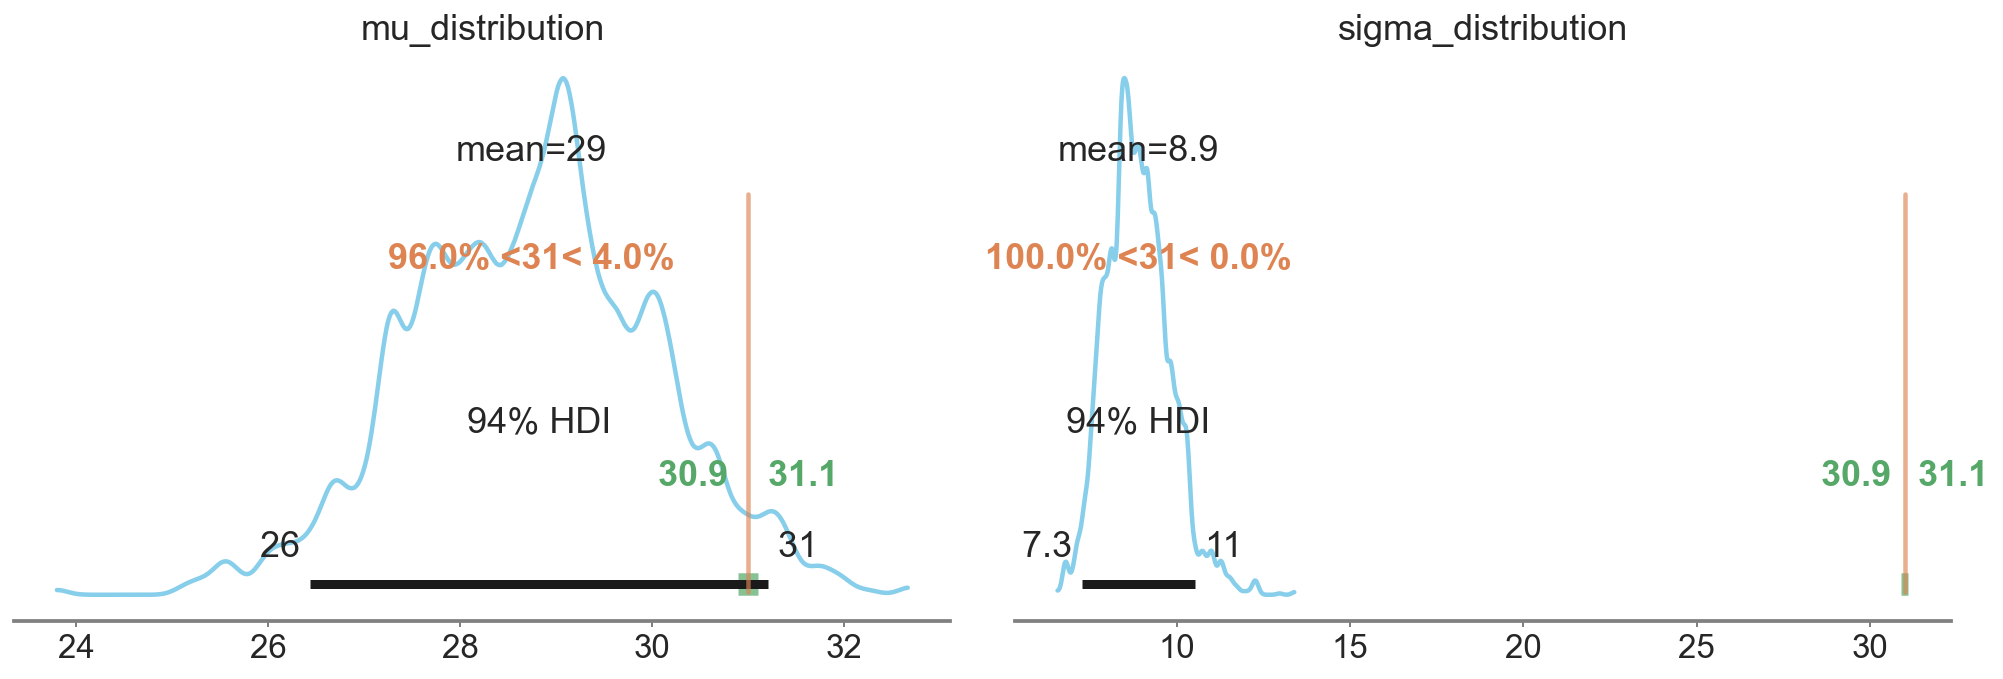

In [9]:
pm.plot_posterior(error_rate_trace, 
                  color='#87ceeb', point_estimate='mean', 
                  rope=[30.9, 31.1], ref_val=31)
plt.show()

In [10]:
pm.summary(error_rate_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_distribution,28.742,1.268,26.439,31.209,0.046,0.033,760.0,760.0,764.0,669.0,1.01
sigma_distribution,8.891,0.913,7.270,10.538,0.033,0.023,775.0,775.0,778.0,831.0,1.01


**My conclusion:**   
From the posterior probability distribution, the mean value is 28.xx and the standard deviation is estimated to be 8.9x. The 94% HDI (credibility interval) contains 31%, so we can not reject the null hypothesis. However, 31 is more than 95.8% of the cumulative probability, so we should collect more data and run the test again.

I prefer Bayesian statistics because we can not only see if there is a difference/effect but also see how likely our hypothesis is true. 